# Object Detection using tiny YOLOv3
This notebook trains the YOLOv3 architecture with the Berkeley Deep Drive dataset and performs some error analysis and other data visualization. 

In [9]:
# Library imports
import json
import os
from os import walk, getcwd
 
import pickle
import os, argparse
from os import listdir, getcwd
from os.path import join


## YOLOv3 Network Architecture
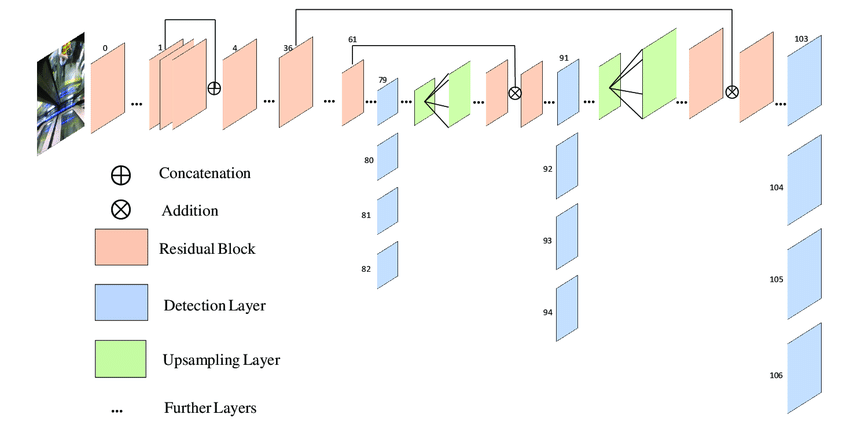

In [10]:

def label2txt(frames, det_path):
    """
    This function converts the labels into a .txt file with the same name as the image. It extracts the bounding box, class info from the 
    .json file and converts it into the darknet format. 
    The darknet format is 
        <object id> <x> <y> <width> <height> 
    :params 
        frames : each image with labeled information in the .json file.  
        det_path : The path to output detection file. 
    """

    for frame in frames:
        img_name = frame['name']
        frame_name = img_name[:-4]

        #Creates, opens, and adds to a txt file with the name of each image.jpg
        f = open(det_path + frame_name + ".txt","w+")

        #For each sub label of each image, get the box2d variable
        #Get the relative center point compared to the image size 1280/720
        for label in frame['labels']:
            if 'box2d' not in label:
                continue
            xy = label['box2d']
            if xy['x1'] >= xy['x2'] or xy['y1'] >= xy['y2']:
                continue
            X = xy['x1']/1280
            Y = xy['y1']/720
            MX = ((xy['x1'] + xy['x2']) / 2)/1280
            MY = ((xy['y1'] + xy['y2']) / 2)/720
            W = xy['x2']/1280
            H = xy['y2']/720
            if X > W or Y > H:
                continue
            lbl = -1

            #provide a number corresponding to the category of sub label for darknet format.
            if(label['category'] == "bike"):
                lbl = 0
            if(label['category'] == "bus"):
                lbl = 1
            if(label['category'] == "car"):
                lbl = 2
            if(label['category'] == "motor"):
                lbl = 3
            if(label['category'] == "person"):
                lbl = 4
            if(label['category'] == "rider"):
                lbl = 5 
            if(label['category'] == "traffic light"):
                lbl = 6
            if(label['category'] == "traffic sign"):
                lbl = 7
            if(label['category'] == "train"):
                lbl = 8
            if(label['category'] == "truck"):
                lbl = 9
            f.write(repr(lbl) + " " + repr(MX) + " " + repr(MY) + " " + repr(W-X) + " " + repr(H-Y) + '\n')

def convert_labels(label_path, det_path):
    """
    Intermediate method called to pass the argument in to the label2txt folder. 
    :params 
        label_path  : The path where image labels are present. Basically the .json file 
        det_path    : The path for the output detection file   
    """
    
    frames = json.load(open(label_path, 'r'))
    det = label2txt(frames, det_path) 


jsonPath_val = '/home/thejoey/Downloads/darknet/bdd100k_data/labels/bdd_val.json'
txtLabelPath_val = '/home/thejoey/Downloads/darknet/bdd100k_data/labels/val/'
jsonPath_train = '/home/thejoey/Downloads/darknet/bdd100k_data/labels/bdd_train.json'
txtLabelPath_train = '/home/thejoey/Downloads/darknet/bdd100k_data/labels/train/'
convert_labels(jsonPath_val, txtLabelPath_val)
convert_labels(jsonPath_train, txtLabelPath_train)




In [13]:

def missing_image(image_path, label_path):
    """
    This function removes the images from the train folder if the correspining labels are not found in the .txt file. 
    NOTE - Make sure you perform the conversion from the label to txt. 
    The code performs the following function, 
    - Takes the input dataset folder path, searches if the images with label information are present. 
    - If not found, removes the image. 
    :params
        image_path  - The directory where the training images are present 
        label_path  - The directory where .txt file correspinding to each image is present. 
    """

    for image in os.listdir(image_path):
        if image.endswith('jpg'):
            image_name = os.path.splitext(image)[0]
            tmp = image_path
            # Corresponding label file name
            
            label_name = image_name + '.txt'
            
            if os.path.isfile(label_path + '/' + label_name) == False:
                print(" -- DELETE IMAGE [Label file not found -- ]")
                image_path = image_path + image_name + '.jpg'
                print(image_path)
                os.remove(image_path)
                image_path = tmp

                
imgPath_train = '/home/thejoey/Downloads/darknet/bdd100k_data/images/train/'
labelPath_train = '/home/thejoey/Downloads/darknet/bdd100k_data/labels/train/' 
missing_image(imgPath_train, labelPath_train)

 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5dc66059-52bfaff7.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7c6fa554-0c165e4f.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5ee6af4d-e02b3213.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6a76c075-d995ef0a.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5ee9e8f1-c1cd62b8.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/69ebe4cd-d5567704.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/75e66365-45cebb67.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/796e51dd-c9ed72e3.jpg
 -- DELE

 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5ee6af4d-b34992f0.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/68ce94b4-855f26a3.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6731a55a-3ecf9a1d.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/734ecaa0-995f18ad.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6e9e3de7-318e1e75.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/647e8e1c-0141c492.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5ea6db6f-fa6b86fb.jpg
 -- DELETE IMAGE [Label file not found -- ]
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5797f14c-159e4924.jpg
 -- DELE

In [14]:
def create_train(train_img_path):
    """
    Creates the .txt file which contains the entire path of the training image file. This file is required to be added in the 
    .data file 
    :params 
        train_img_path : The path of the training images 
    """

    f = open("train.txt", "w+")
    for subdirs, dirs, files in os.walk(train_img_path):
        for filename in files:
            if filename.endswith(".jpg"):
                train_image_path = os.path.join(train_img_path, filename)
                print(train_image_path)
                f.write(train_image_path + "\n")
    f.close()

def create_val(val_img_path):
    """
    Creates the .txt file which contains the entire path of the validation image file. This file is required to be added in the 
    .data file 
    :params 
        val_img_path : The path of the validation images  
    """

    f = open("val.txt", "w+")
    for subdirs, dirs, files in os.walk(val_img_path):
        for filename in files:
            if filename.endswith(".jpg"):
                val_image_path = os.path.join(val_img_path, filename)
                print(val_image_path)
                f.write(val_image_path + "\n")
    f.close()

    
trainPath = '/home/thejoey/Downloads/darknet/bdd100k_data/images/train/'
valPath = '/home/thejoey/Downloads/darknet/bdd100k_data/images/val/'
create_train(trainPath)
create_val(valPath)

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/ac756fd5-13f527ef.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/14532464-0ab1e53e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/58df3474-501a4fc6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/740705f5-35e42a74.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/affa0246-22490c0f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5e26f49d-0bc53c7e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/97b65dd9-2ba0bf8f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/870a5e81-c4896325.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/221a7d5f-35ec8842.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/02c26e9d-02585e70.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/74ba4269-7cabd16a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/32464799-422f0752.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/38221668-69780e2f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6fa4d060-f9df0ee4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7ff560ed-d8400138.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1b2ae45a-b7eea392.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a915ca5a-b6414c33.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/50571a8b-38b6fdf3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/57ab3757-33e8f753.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5593a2c4-cd89f181.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1fdf9217-47d61d91.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/00f42f6b-699a498c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3918eda3-f899a96e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0595ae40-165060d1.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5b4cc6fb-6275ed86.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/13796ade-ec1a9a69.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3068c105-a8f3f0c0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/776645a9-7ee7413e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/26aba080-04d79638.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/95b15293-8362e693.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/82122c73-d9a6d59c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6af46b5b-e51eb44c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/051a273b-48b86bf6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/064bad4e-ae51d829.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1127dc70-11f0ac18.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0aa52205-d9b7723f.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2ab2f4ce-f27276ed.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/55f2b162-5dcb79a6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4d97e3fb-537b9098.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8c6d5b0c-6909d5c2.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0c28e5a2-5348be35.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1498f75e-815fe3cf.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/39d86fbf-c02b93b4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2e456fc7-595b22a4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a47bdf3d-4eff1b65.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8bfe3b5c-b07f2503.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a3259007-6e14f40a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8d91b68a-9f5d23c1.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1523cfc0-fe5470d2.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9e7ff3bb-c4dc8d38.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7f779efe-b4cd9a27.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a6369e08-3744b1ce.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a5715983-cdf6c729.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1306e2f4-1aa5b1d3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3997f923-459693f7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/71b8b63a-6cfdb9f7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/856a6468-656ff52a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2f002d9f-159af325.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6b607cdb-f80135a5.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9f9f4c3d-223d7e85.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3fecff67-927901cc.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a9d7044a-2c83901c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2b5f0ec4-4167d7b4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6025ffbe-7e3abd16.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1fbef7cf-7b5064ab.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/05488fc6-60c74982.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7e4ab78b-08436808.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/ad72661a-0a669fae.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/82b6ce35-b9d3c9df.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6891f028-014c7789.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0a3f8f94-2208fb12.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/60c678e7-31cf8e6a.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6e9218ce-8a8926c1.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3f6f9965-0d040ecf.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7b17ffd8-e22a5160.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/56b121e7-2a4b2728.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/81079dfa-d9218402.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/939b461b-0fe3a7f0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/26fdb0c0-68b94176.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9a35e283-7c9c5789.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0b099136-a9ec5a5f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/53a79e2d-7d41db9e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3bd94f37-44660b0c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0081e3ea-9f5dda4a.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/88ac8b68-cbb3e361.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4bb5ca13-ee4c31ec.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4f516ff3-c5c1473b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/93df80e9-3024c4b9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9f3091e4-248c42d0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7ddd304a-88962958.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/226d2541-103187f3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/82111fe7-9f008582.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/703e08dd-57ba4c84.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/894c7dde-fa4830b6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3eed9d12-2574b586.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4b6cf073-a670d132.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3c39180d-db261555.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/175b12ee-a83f8efd.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/af8b168e-3f17dc1b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/39c7b5ea-34049559.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4ff09088-cffaec8b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/30ee6718-84efe35d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5e651102-312d39f0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/81624ec6-326046c8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0320e1b6-1f0880ad.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/31cbf83b-754bb5b9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8c7284fb-e2ac86fc.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8f36248c-3bb0d890.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/136f3a1f-86e695b8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3a697de7-a4f8e984.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/08854b71-31e40c79.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/948f2793-14cc71f7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/242e3248-367245be.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/084071b2-5c01f0f9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a533bbf4-334e448b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/fdebd387-641a87c1.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/69987804-3a11739d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1ec5355a-03e3548c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/60e6a1f9-120d1998.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2717b146-1e607a26.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/617336b2-722db399.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/24887ac4-1a62d8fc.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/608e3aa4-010de0fc.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/39e7b768-65946398.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/166be2aa-cff8b6f4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/67def000-3d3e436d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1652cc22-c43187ce.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a310e8f3-65a5066d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5f0b4aed-c9e1134f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a5e25f65-0ad52900.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/69fa307b-9f08613a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6f78be9e-90e530e4.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9d252184-aa1f32a0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/60ce4ec3-6870d075.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0ec63036-5dea7ef4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/082f557c-383ed941.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/66fab43d-11e25975.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4898268d-ae321097.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/31101f08-7a2873c7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/29190b6b-7b555e4b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7d3de15f-923662a0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2f5b65f6-a449be4a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/107eb708-dfb8b5ac.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/aff10705-46a498de.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3d541cc5-5a5d0978.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0a006b7b-ff7dae0c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2b01a56a-9bdb518d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/11aa2576-4ce9a733.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/57953c32-4d3a43b9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4707a83b-3d727bb5.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/14a34b0d-36f4de12.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6f025329-2ecf5714.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9d167a7d-144d1f3a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/52f65e74-adcdeaec.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/53fc3ee0-8a9425f3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/13dcc2ca-5e94475c.jpg
/home/thejoey/Downloads/darknet/bdd100k_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9fb1582d-7326109f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/67c3676f-b56c987c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/305a40c9-2407c885.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/34ce1f4c-a4b1b1ca.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6feede64-1a876fd7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/09671fd4-6c127018.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0f8fd55d-a77de0d3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7944f396-d70990af.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9fbdb044-02a08068.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4b2de23a-da3190c3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/298b7f2c-d3604599.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/717451b3-c12203a9.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/81d6fd24-d8f88f6d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2a77fc58-14b96f24.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/15e7be3e-0077497c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/458503c5-6c7d2658.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9bf983b2-14b1db6e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/036f07d5-a41ae610.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5545cf4b-cc1706f6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/114e578a-6311a4ca.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8f63216d-12e0423f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9b9188bc-93b684c6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/44d3cfb5-bc3df21e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/30e7b626-c4e4a831.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/76227efe-994454d6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/355dcba7-6921f1e0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/ae8327a0-ee9df023.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/56f00e30-9a0affc4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/36824007-098b5b92.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6b66e427-5cc5b17b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9cee0779-7b0df812.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5b1a62f1-0e829af2.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7997e3c8-c79d8c5c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3c96eed8-499edcd6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5252e422-d5249655.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1737fe46-ff326ab0.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9530facd-e3715b3f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/696ae768-4824d4a4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/98cf94d9-ac294b9a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/641ae97b-8bc8e3b9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/47a82975-ef61287a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/48421180-ff5d74c2.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/87fb836b-a6cb6686.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/7cb86395-71e72dde.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0efa02a1-c066f23e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/87446754-21ecded8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2ae26e5b-15158620.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/996d57c7-ace787d9.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/537e0c69-ee340c10.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6f123667-0177b7e8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/17ebf0a9-b38d31c3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a2372820-3fd79f06.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8618798f-0cae62fd.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/3ebef51a-f2c85c45.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/519e14f6-1f44b61e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a633af70-ba81c601.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a9e9f579-61427abd.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/827ce8e3-101b64b1.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4b4cf458-b1a02460.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/10189cd7-7a70b244.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a5c880cf-bc6b1983.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/304bf92e-a160976c.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2cc27873-1866f9e0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/10af6ba8-47f7bd63.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/aaa27eab-84a918a3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5fa17a25-88b8e6b9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/573d57ae-657ba8ec.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8b3bac6d-1e343ce3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/06a4abd2-cbbaaf3f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1d241258-a3b2237d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1e9c6b63-ac4ab4ab.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/172af249-4c964112.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/580262f8-cd442b1f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/9a2fb809-31c4cdd3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/4111811c-c4f89a21.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/601eb1af-aabfaeb6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a7166e11-50ff0b22.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/124c7772-308b13ef.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/1d351c3a-4a47370d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6d2d0a1d-a3360e52.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6ac54196-c6f3cbfa.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/23a3d4cb-2e85c856.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/5da6c6b6-5d7fe576.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/0f0f2997-42e4ec74.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/train/13b2db9c-94e82517.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/8803cd52-6a72e0e9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/aae8ecee-a246b163.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/754d0f3d-9ecccae8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/6421fb4c-1eca1136.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/51bf12c4-91866b90.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a1e747b1-9f22bc39.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/2ce0b449-94562b29.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/a3cd917a-7fbab6d4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/20c07e25-6d2d1448.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/56e7ec75-e4d60863.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/train/73494fb5-9aae4d0a.jpg
/home/thejoey/Downloads/darknet/bdd100k_

/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c7284932-c3a7badf.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c0f89882-542093a7.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c36ded7c-a435e454.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b7979b09-89a5a8ea.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bce0262b-e0b48a31.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b93e2268-40e27a6d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bd355fcc-677a5dc3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bcd32109-8b0b1eef.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bf5b7ee3-c2fbdc46.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b1d7b3ac-5744370e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c154b889-9f8ad734.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c7894612-eab9f189.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b3a7b21a

/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c9403737-3743ae01.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/ba4bcdc5-06e22f87.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b7ba2ed7-7f381040.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b6630cba-4950a75a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c155d65b-2d961d55.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bafeadd4-255dc46e.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c0edf06a-74008e93.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c595de6c-1fe5d3df.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c6a4abc9-e999da65.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b7719f1d-8245d9ce.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bbc19c5e-51fd9cc0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/baa9acbe-f3af19f6.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bf7e1159

/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c566026b-3127f5d8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c273e0e3-050cf9b4.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b4be0173-249b5f2f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b46efeed-d21567e0.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b7e8932c-3f90dbfc.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b6579e76-9da25188.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c1bd4140-645c2847.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b5b17442-df28704b.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c993615f-ae30e2cb.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bc8cb926-c12df6cb.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b4d65110-23299ece.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b898a22f-d6bcd9d3.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c57363a5

/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c121f402-2e25ddb9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b888e048-8018b284.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/ca561e94-d40cddf8.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c2fb790e-4cd5a630.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b4c5ea2e-1a3ea72a.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c60144b6-62841efb.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c8359900-96959e0f.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c7415d8d-dfb8ef47.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c4494f87-59e5c703.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/b54578dc-5a2c0b63.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/bdfa3a60-fdd4a2f9.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c8e01103-9ff8595d.jpg
/home/thejoey/Downloads/darknet/bdd100k_data/images/val/c9de245d